In [2]:
######################################
##                                  ##
##        DISSECTS DATA             ##
##                                  ##
#####################################
import random
import pandas as pd
import numpy as np
import statistics
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')
#pd.options.display.max_rows = 100

In [4]:
#basically shows the data frame
#uncomment to see the data frame
df.head()

,periodid,periodname,periodcode,perioddescription,dataid,dataname,datacode,datadescription,Baringo County,Bomet County,...,Siaya County,Taita Taveta County,Tana River County,Tharaka Nithi County,Trans Nzoia County,Turkana County,Uasin Gishu County,Vihiga County,Wajir County,West Pokot County
0,202201,January 2022,202201,NaN,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,NaN,NaN,2644.0,626.0,...,67556.0,496.0,4000.0,1148.0,4598.0,31277.0,3127.0,29950.0,1146.0,8189.0
1,202202,February 2022,202202,NaN,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,NaN,NaN,3529.0,444.0,...,52890.0,983.0,2889.0,1398.0,5390.0,23382.0,2006.0,20458.0,1197.0,6908.0
2,202203,March 2022,202203,NaN,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,NaN,NaN,2998.0,460.0,...,50940.0,1015.0,2392.0,671.0,6367.0,19729.0,2093.0,19161.0,885.0,6343.0
3,202204,April 2022,202204,NaN,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,NaN,NaN,2755.0,508.0,...,41512.0,698.0,1567.0,509.0,5187.0,22980.0,1221.0,18753.0,936.0,9657.0
4,202205,May 2022,202205,NaN,cPlWFYbBacW.w77uMi1KzOH,MOH 743 Rev2020_Rapid Diagnostic Tests Total Q...,NaN,NaN,2878.0,355.0,...,63304.0,748.0,2239.0,1507.0,11820.0,35963.0,1595.0,34762.0,1236.0,13388.0


In [5]:
#get the columns
#uncomment to run
columns = df.columns


In [6]:
#get the info and shape
#uncomment to run
info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   periodid                60 non-null     int64  
 1   periodname              60 non-null     object 
 2   periodcode              60 non-null     int64  
 3   perioddescription       0 non-null      float64
 4   dataid                  60 non-null     object 
 5   dataname                60 non-null     object 
 6   datacode                0 non-null      float64
 7   datadescription         0 non-null      float64
 8   Baringo County          60 non-null     float64
 9   Bomet County            60 non-null     float64
 10  Bungoma County          60 non-null     float64
 11  Busia County            60 non-null     float64
 12  Elgeyo Marakwet County  60 non-null     float64
 13  Embu County             59 non-null     float64
 14  Garissa County          60 non-null     floa

In [7]:
shape = df.shape
col = shape[0]
rows = shape[1]

This is conversion of the county names to first single names for accessibility. I.e Tharaka Nithi -> tharaka

In [8]:
#rename the columns
new_names  = {"Baringo County": 'baringo', "Bomet County": 'bomet', "Bungoma County": 'bungoma', "Busia County": 'busia', "Elgeyo Marakwet County": 'elgeyo',
               "Embu County": 'embu', "Garissa County": 'garissa', "Homa Bay County": 'homabay', "Isiolo County": 'isiolo', "Kajiado County": 'kajiado',
                "Kakamega County": 'kakamega', "Kericho County": 'kericho', "Kiambu County": 'kiambu', "Kilifi County": 'kilifi', "Kirinyaga County": 'kirinyaga',
                "Kisii County": 'kisii', "Kisumu County": 'kisumu', "Kitui County": 'kitui', "Kwale County": 'kwale', "Laikipia County": 'laikipia', "Lamu County": 'lamu',
                "Machakos County": 'machakos', "Makueni County": 'makueni', "Mandera County": 'mandera', "Marsabit County": 'marsabit', "Meru County": 'meru', "Migori County": 'migori',
                "Mombasa County": 'mombasa', "Muranga County": 'muranga', "Nairobi County": 'nairobi', "Nakuru County": 'nakuru', "Nandi County": 'nandi', "Narok County": 'narok',
                "Nyamira County": 'nyamira', "Nyandarua County": 'nyandarua', "Nyeri County": 'nyeri', "Samburu County": 'samburu', "Siaya County": 'siaya', "Taita Taveta County": 'taita', 
                "Tana River County": 'tanariver', "Tharaka Nithi County": 'tharaka', "Trans Nzoia County": 'trans', "Turkana County": 'turkana', "Uasin Gishu County": 'uasin',
                "Vihiga County": 'vihiga', "Wajir County": 'wajir', "West Pokot County": 'westpokot'}

months  = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
counties = [k for k,v in new_names.items()]

df.rename(columns=new_names, inplace=True)
#df['kisii']

In [9]:
#get all period ids -> so as to get specific data in each county 
#with these ids we can get totals across months 
#1.per month first
period_ids  =  [ period for period in df['periodid']]
period_names = [ periodname for periodname in df['periodname']]

#df.loc[df['periodid'] == 201809,'bomet'].isnull().sum()

In [10]:

#getting total nulls for all counties or a single county
null_data  = []

def check_null_values(county=None):
    #null_values.clear()
    if county == None:

        for k,v in new_names.items():
            
            for periodid in period_ids:
                total_null = df.loc[df['periodid'] == periodid, v].sum()
                
                if total_null == 0:
                    #print(total_null)
                    null_data.append(f"{k} -> {total_null} -> {periodid}")
                    
                else:
                    pass

        """if len(null_data) == 0:
                print("No null values in the dataset")

        else:
            for null_values in null_data:
                print(null_values)"""
                    

    elif county != None:

        #total_null = df[county].isnull().sum()
        for periodid in period_ids:
                total_null = df.loc[df['periodid'] == periodid, county].sum()
                #print(total_null)
                if total_null == 0:
                    null_data.append(f"{county} -> {total_null} -> {periodid}")
                else:
                    pass
        """if len(null_data) == 0:
            print(f"{county} has no null values")
        else:
            for null_values in null_data:
                print(null_values)"""
                     
#can take a single county or loop through all counties
check_null_values()
no_data_recorded = null_data #a list



In [11]:
#replace null value with 0
null_values = {}
def fillna(county=None):
    if county == None:
        for k,v in new_names.items():
            #get the total of missing values 
            total_null = [df[v] > 202]
            print(f"{k} -> {total_null}")
    elif county != None:

        total_null = df[county].isnull().sum()
        print(f"{county} has {total_null}s")
#fillna()
df.fillna(0, inplace=True)


##THE QUAGMIRE

In [30]:
#this function or group of functions tend to show results:
#1.The whole year per county i.e how much commodities dispatched for nakuru county in 2018 or 2019
county_monthly_data = []
month_indices = []
county_yearly_consumption = {}
def get_month_year_indices(year):
    """
    The get_month_year_indices function:
      1.gets the year in a perfect periodid as represented in the csv.
      2.takes the parameters year,period, and reverse:
         - year    - specify the particular year
         - period  - specify the number of months you want to get data from(default=12).
    """
    month_indices.clear()
   #loop through each month from January(01) to dec(12)
    month_index  = 1

    #i.e 201801 to 201812

    for month_index in range(int(12)):

      if month_index <= 8:

         periodid = f"{year}0{month_index+1}"
         month_indices.append(periodid)
         
      else:

         periodid = f"{year}{month_index+1}"
         month_indices.append(periodid)

def county_year_consumption(county,year):

    """This county_year_consumption function gives out the total commodities dispatched a certain complete year
       for a particular county
    """
    #run above function to get the year periods in place
    get_month_year_indices(year)

    county_monthly_data.clear()
    try:
      for periodid in month_indices:
         val = df.loc[df['periodid']==int(periodid)].sum()
         
         commodity_total = val[county]
         
         county_monthly_data.append(commodity_total)
         
         #return f"{county} has {commodity_total} kits in {periodid}"
      
       
    except Exception as e:
       
       if e.__class__.__name__ == 'KeyError':
          print("Check if the county name is accurate.Or ask the lead developer for solution.")

"""####this function loops through each year, each county to get data distributed in that particular year
def raw_distribution_pkl():

   years = set([str(year)[:4] for year in period_ids])
   
   for year in years:
      
      for k,v in new_names.items():
         
         res = county_year_consumption(v,year)
         print(res)
         
raw_distribution_pkl()
print(county_monthly_data)"""


def total_county_year_consumption(county,year):
   
   """This total_county_year_consumption function gets the total amount of data per year and per county i.e Year 2018 Nakuru 90000 commoidities """
   county_yearly_consumption.clear()
   if county != 'all':
      county_year_consumption(county,year)
      county_yearly_consumption[county] = np.sum(county_monthly_data)

   elif county == 'all':

      for k,v in new_names.items():
       
         county_year_consumption(v,year)
         county_yearly_consumption[v] = np.sum(county_monthly_data)

      
#total_county_year_consumption('kakamega', 2022)
#print(county_yearly_consumption)
   



{}


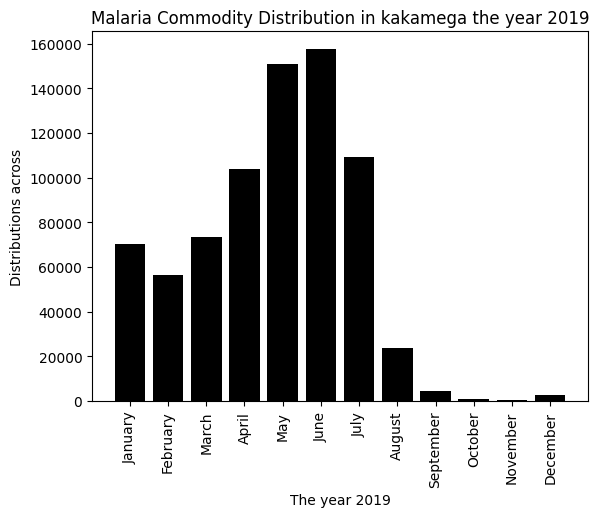

In [40]:
#visualize distributions in a particular county and particular year i.e Nakuru distribution in 2018 from jan - dec
def visualize_monthly(county,year):
    """
    The visualize_monthly function, visualizes 
    """
    county_year_consumption(county,year)
    
    data_values = county_monthly_data

    colors  = ['green', 'red', 'blue', 'black', 'purple', 'yellow', 'orange', 'white', 'gray']

    plt.bar(months, data_values, color = random.choice(colors), width =0.8)

    plt.xlabel(f"The year {year}")
    plt.ylabel("Distributions across")
    plt.title(f"Malaria Commodity Distribution in {county} the year {year}")
    plt.xticks(rotation = 90)

visualize_monthly('kakamega', 2019)



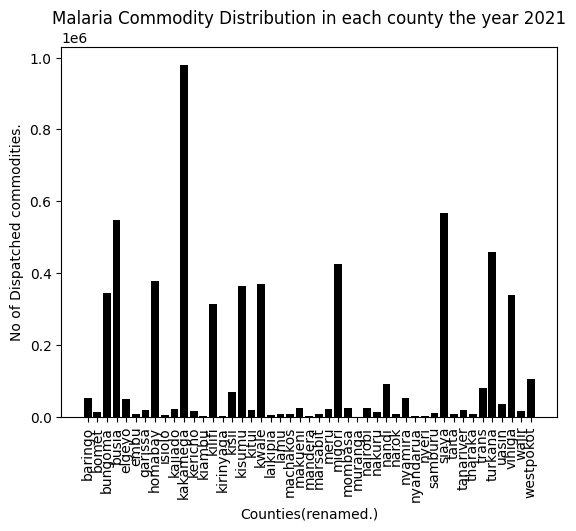

In [14]:
#visualize data distibuted in a particular year in all counties
def visualize_year_distribution(county,year):
    total_county_year_consumption(county,year)

    counties  = list(county_yearly_consumption.keys())
    commodity_values = list(county_yearly_consumption.values())
    colors  = ['green', 'red', 'pink', 'blue', 'black', 'purple', 'yellow', 'orange', 'white', 'gray']

    plt.bar(counties, commodity_values, color=random.choice(colors), width=0.8)

    plt.xlabel("Counties(renamed.)")
    plt.ylabel(f"No of Dispatched commodities.")
    plt.title(f"Malaria Commodity Distribution in each county the year {year}")
    plt.xticks(rotation = 90)

visualize_year_distribution('all',2021)



In [15]:

###############################################################
##                                                            #
## MONTH : BASED ON MONTH   AND PER CERTAIN ID                    
##I.E 202212 DATA COLLECTED ON 2022 , 12TH DEC EACH CPUNTY
###############################################################
#a function to dispaly total items per county 
#each county each period
county_monthly_consumption = []
county_names  = []
def all_items(county=None,periodid=None):
    county_monthly_consumption.clear()
    county_names.clear()
    try:
        if county == None and periodid == None:
            for periodid in period_ids:

                val = df.loc[df['periodid']==periodid].sum()

                for k,v in new_names.items():
                    #print(v)
                    commodity_total = val[v]
                    #print(f"{v} has {commodity_total} kits in {periodid}")

        elif county == None and periodid != None:
    
            val = df.loc[df['periodid']==periodid].sum()

            for k,v in new_names.items():
                #print(v)
                commodity_total = val[v]
                county_monthly_consumption.append(commodity_total)
                county_names.append(v)#
                
                #print(f"{v} has {commodity_total} kits in {periodid}")
            #print(county_monthly_consumption)

        elif county != None and periodid != None:

            val = df.loc[df['periodid']==periodid].sum()
        
            commodity_total = val[county]
            
            print(f"{county} has {commodity_total} kits in {periodid}")

        elif county != None:

            for periodid in period_ids:

                val = df.loc[df['periodid']==periodid].sum()

                commodity_total = val[county]
                #print(f"{county} has {commodity_total} kits in {periodid}")

        else:

            print("A grave error, an error that should'nt occur has occurred!")

    except Exception as e:

        if e.__class__.__name__ == 'KeyError':
            print("An error occurred please report it out!")

all_items('kisii', 201802)

kisii has 1996.0 kits in 201802


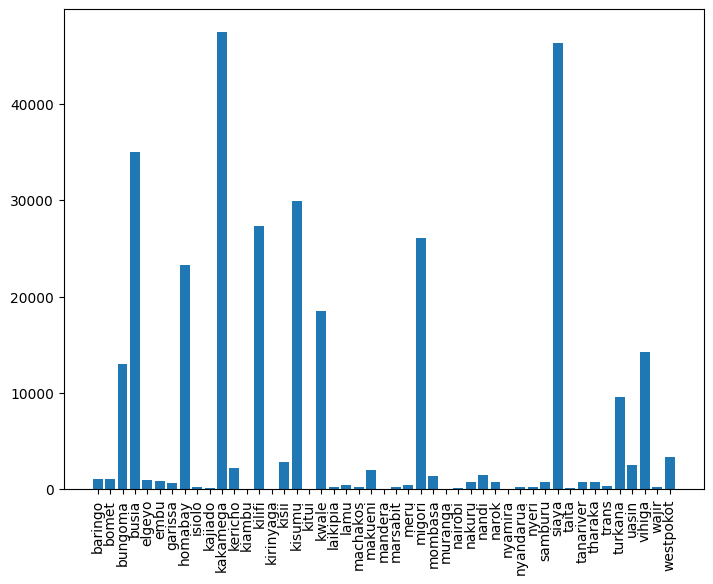

In [16]:
#the following function plots commodities dispatched to all countries in a certain month , particular year
#X-axis has total number of commodities sent that year
#Y-axis has the counties 

#all_items(periodid=201801)
def per_month_year_plot(year):
    #get values for each county(y axis) in a list
    all_items(periodid=year)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    langs = county_names
    students = county_monthly_consumption
    ax.bar(langs,students)
    plt.xticks(rotation=90)
    plt.show()
    

per_month_year_plot(201812)

In [17]:
###############################################################
#get total, mean and median for every row (each  month begin from 202201 to 201812)
#ie summation across january on 2021 or accross feb
#import numpy to get mean
#get data for each county and  whole year for rows
###############################################################

total_items_each_row = []

county_yearly_vals = []
def total_items_per_row(period=None,county=None):
    total_items_each_row.clear()
    
    try:
        row_data = df.loc[df['periodid'] == period].sum()
        
        for k,v in new_names.items():
                #print(k,row_data[v],period)
                total_items_each_row.append(row_data[v])
        
        #print(statistics.fmean(total_items_each_row))
        total_items_per_period = np.sum(total_items_each_row)
        mean_total_items = np.mean(total_items_each_row)
        median_total_items = np.median(total_items_each_row)

        return {"sum": total_items_per_period, "mean": math.floor(mean_total_items), "median": median_total_items}

    except Exception as e:
        print("Wasn't supposed to happen!")
#total_items_per_row(202201)

In [18]:
###############################################################
#get total, mean and median for every column (each  year begin from 202201 to 201812)
#ie summation from jan to dec each year
#
###############################################################

county_yearly_vals = []
def total_items_per_column(period=None,county=None):
    
    county_yearly_vals.clear()
   
    if county == None:
        print("Please select a county for now!")
    else: 
        try:
            #select the column data("county")
            county_values = df[county]
            #print(period)
            column_data = county_values.loc[df['periodid'] == period].sum()
            
            return column_data
            """for k,v in new_names.items():
                    total_items_each_row.append(row_data[v])
            
            total_items_per_period = np.sum(total_items_each_row)
            mean_total_items = np.mean(total_items_each_row)
            median_total_items = np.median(total_items_each_row)

            return {"sum": total_items_per_period, "mean": math.floor(mean_total_items), "median": median_total_items}"""

        except Exception as e:
            print("Wasn't supposed to happen!")

         

#total_items_per_row(202201)

In [19]:
#get data for each county and  whole year
###########################################################################################
## EACH COUNTY GETS TOTAL DATA FOR A PARTICULAR YEAR                                    ###  
##I.E TAKES A PARTICULAR YEAR AND COUNTY, GETS THE DATA BY LOOPING THROUGH EACH MONTH  ###
#########################################################################################
years = set([str(year)[:4] for year in period_ids], )

county_yearly_report = {}
def county_yearly_reports():
    
    #2022,2021,2020,2019,2018

    for year in sorted(years):
            #print(year)
            #locate all rows with specific years
            #total_mean = []
            total_sum = {}
            total_per_column = []
            #total_median = []

            for period in period_ids:
                
                if str(period)[:4] == str(year):
                    values = total_items_per_column(period=period,county='baringo')
                    total_per_column.append(values)
# 
county_yearly_reports()
    

In [20]:
#get total sum, mean and median per year
#the dict takes in a specific year and the total
###############################################################
##
## MONTH : BASED ON YEARS AND SUMS ACROSS ALL COUNTIES                    
##I.E TAKES A PARTICULAR YEAR AND GETS THE DATA ACROSS AND SUMS ALL FOR THAT YEAR LOOPING THROUGH EACH
###############################################################
yearly_report = {}

def yearly_reports(year=None):
    
    #2022,2021,2020,2019,2018

    for year in sorted(years):
            
            #locate all rows with specific years
            total_mean = []
            total_sum = []
            total_median = []
            for period in period_ids:
                if str(period)[:4] == str(year):
                    values = total_items_per_row(period)
                    #print(values, period)
                    total_sum.append(values['sum'])
                    total_mean.append(values['mean'])
                    total_median.append(values['median'])
            #print(monthly_totals)
            sums = np.sum(total_sum)
            mean = np.sum(total_mean)
            median = np.sum(total_median)
           
            yearly_report[year] = {"sum": sums, "mean": mean, "median": median}
    #print(yearly_report)

yearly_reports()
print(yearly_report)
    

{'2018': {'sum': 4898535.0, 'mean': 104220, 'median': 17599.0}, '2019': {'sum': 4896284.0, 'mean': 104170, 'median': 17210.0}, '2020': {'sum': 4162071.5, 'mean': 88548, 'median': 17347.0}, '2021': {'sum': 5930233.0, 'mean': 126169, 'median': 19683.0}, '2022': {'sum': 6156400.0, 'mean': 130982, 'median': 17875.0}}


In [21]:
##get summation of the total in all those years present
summation = {}

def year_summation():
    #loop through yearly reports to get general total supplied for the past 5 years
    sums = []
    mean = []
    median = []
    for k,v in yearly_report.items():

        sums.append(v['sum'])
        mean.append(v['mean'])
        median.append(v['median'])

    summation_of_sums = np.sum(sums)
    summation_of_mean = np.sum(mean)
    summation_of_median = np.sum(median)

    summation['all_annual_total'] = {'annual_total': summation_of_sums,
                                      'annual_mean': summation_of_mean,
                                      'annual_median': summation_of_median,
                                      } 
    
year_summation()

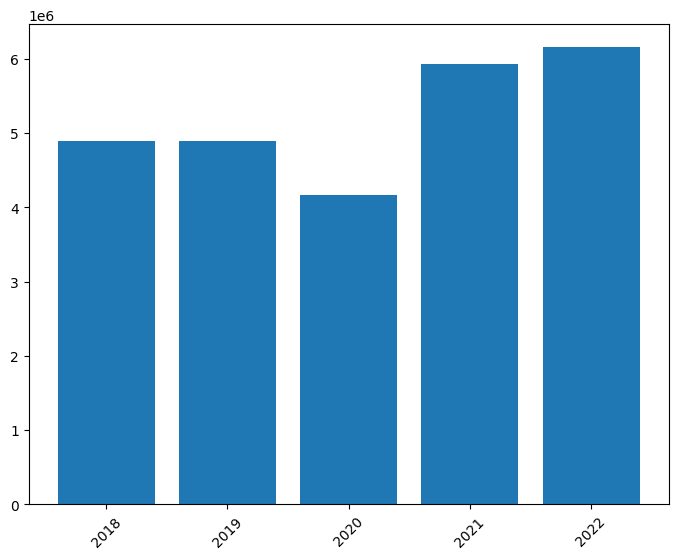

In [22]:
#the following function plots the results for each year since 2018 - 2022
#X-axis has the years
#Y-axis has the value in those respective years

#all_items(periodid=201801)
def years_distribution_plot(year=None):
    year_values = []
    
    years = [] 
    
    for k,v in yearly_report.items():
        year_values.append(v['sum'])
        years.append(k)
    #print(year_values)
    #get values for each county(y axis) in a list
    all_items(periodid=year)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(years,year_values)
    plt.xticks(rotation=45)
    plt.show()

    #print(year_values)
    #print(years)
    

years_distribution_plot()